In [1]:
import cv2
import numpy as np
import pandas as pd
from time import time, sleep
from os import makedirs, path
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
import glob

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Prepare Data

In [2]:
classes = np.loadtxt('cifar/labels.txt', dtype=str).tolist()
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [3]:
img_list = glob.glob('cifar/train/*.png')
img_list.sort()
img_list[:20]

['cifar/train/0_frog.png',
 'cifar/train/10000_automobile.png',
 'cifar/train/10001_frog.png',
 'cifar/train/10002_frog.png',
 'cifar/train/10003_ship.png',
 'cifar/train/10004_ship.png',
 'cifar/train/10005_cat.png',
 'cifar/train/10006_deer.png',
 'cifar/train/10007_frog.png',
 'cifar/train/10008_airplane.png',
 'cifar/train/10009_frog.png',
 'cifar/train/1000_truck.png',
 'cifar/train/10010_airplane.png',
 'cifar/train/10011_cat.png',
 'cifar/train/10012_frog.png',
 'cifar/train/10013_frog.png',
 'cifar/train/10014_dog.png',
 'cifar/train/10015_deer.png',
 'cifar/train/10016_ship.png',
 'cifar/train/10017_cat.png']

In [4]:
def load_png(img_list):
    imgs = []
    labels = []
    for i in range(len(img_list)):
        # img
        img = cv2.imread(img_list[i])
        #label
        name = img_list[i].split('_')[-1][:-4]
        label = classes.index(name)

        imgs.append(img)
        labels.append(label)
    return imgs, labels

imgs, labels = load_png(img_list)


img shape: (32, 32, 3)
4 - deer


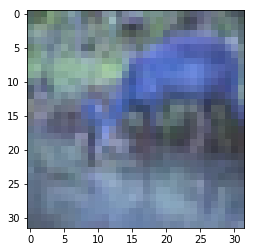

7 - horse


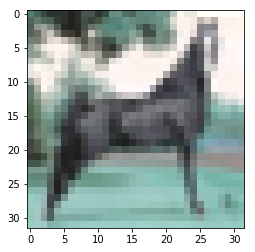

3 - cat


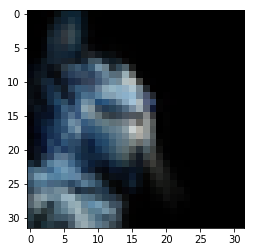

5 - dog


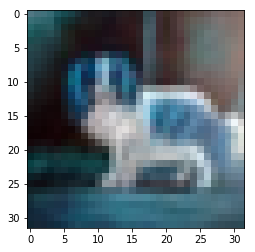

6 - frog


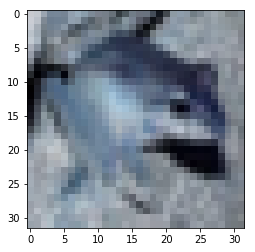

7 - horse


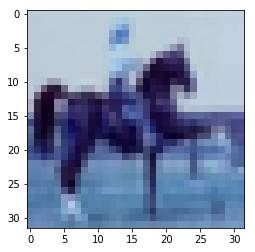

7 - horse


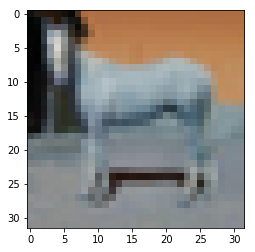

3 - cat


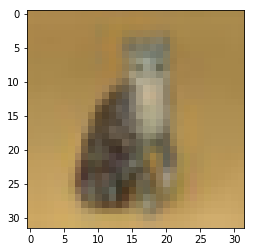

0 - airplane


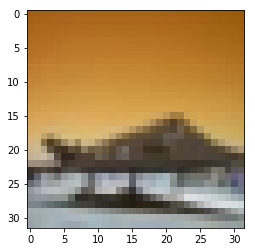

6 - frog


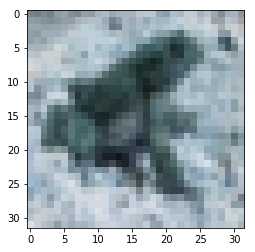

1 - automobile


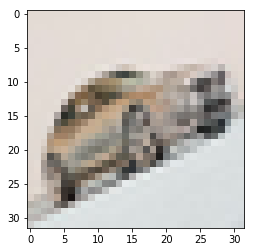

4 - deer


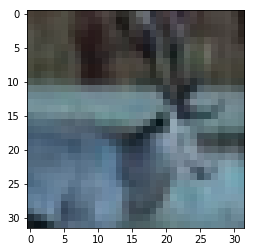

8 - ship


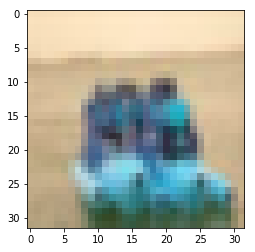

6 - frog


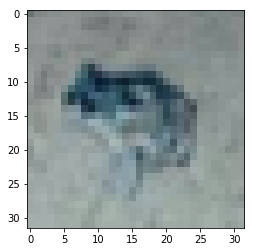

5 - dog


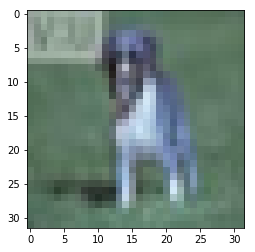

7 - horse


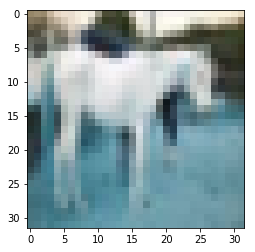

6 - frog


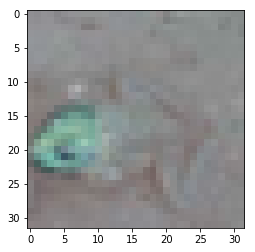

9 - truck


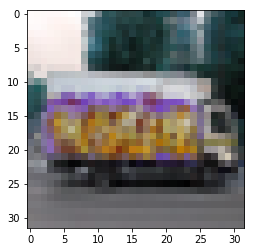

6 - frog


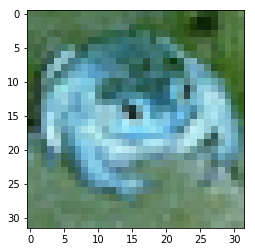

3 - cat


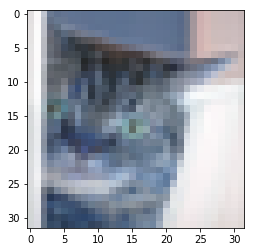

In [5]:
print('img shape:', imgs[2].shape)

for _ in range(20):
    i = np.random.randint(len(imgs))
    print(labels[i], '-', classes[labels[i]])
    plt.imshow(imgs[i])
    plt.show()
    

In [6]:
def to_dataset(imgs, labels):
    X, Y = [], []
    for i in range(len(imgs)):
        label = np.zeros(10, np.int32)
        label[labels[i]] = 1
        X.append(imgs[i])
        Y.append(label)
    X = np.asarray(X, dtype=np.float32)/255
    Y = np.asarray(Y, dtype=np.int32)
    X, Y = shuffle(X, Y)
    return X, Y    

x, y = to_dataset(imgs[:20], labels[:20])
print(x.shape)
print(y.shape)
y

(20, 32, 32, 3)
(20, 10)


array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]], dtype=int32)

# Model and Training

In [7]:
N_EPOCHS = 20
valid_size = 512
BATCH_SIZE = 32

valid_batch_order = list(range(len(imgs)))[-valid_size:]
batch_imgs = [imgs[i] for i in valid_batch_order]
batch_labels = [labels[i] for i in valid_batch_order]
valid_x, valid_y = to_dataset(batch_imgs, 
                              batch_labels)  

In [8]:
tf.reset_default_graph()

y = tf.placeholder(tf.int32, shape=[None, 10], name='y') 
x = tf.placeholder(tf.float32, [None, 32, 32, 3], name='x')

, kernel_initializer=tf.TruncatedNormal(stddev=0.01), bias_initializer=tf.Constant(0)

conv11 = tf.layers.conv2d(inputs=x, filters=16, kernel_size=3, padding="same", activation=tf.nn.relu, name="conv11")
conv12 = tf.layers.conv2d(inputs=conv11, filters=16, kernel_size=3, padding="same", activation=tf.nn.relu, name="conv12")
pool1 = tf.layers.max_pooling2d(inputs=conv12, pool_size=2, strides=2, name='pool1')

conv21 = tf.layers.conv2d(inputs=pool1,  filters=32, kernel_size=3, padding="same", activation=tf.nn.relu, name="conv21")
conv22 = tf.layers.conv2d(inputs=conv21, filters=32, kernel_size=3, padding="same", activation=tf.nn.relu, name="conv22")
pool2 = tf.layers.max_pooling2d(inputs=conv22, pool_size=2, strides=2, name='pool2')

conv31 = tf.layers.conv2d(inputs=pool2,  filters=64, kernel_size=3, padding="same", activation=tf.nn.relu, name="conv31")
conv32 = tf.layers.conv2d(inputs=conv31, filters=64, kernel_size=3, padding="same", activation=tf.nn.relu, name="conv32")
pool3 = tf.layers.max_pooling2d(inputs=conv32, pool_size=2, strides=2, name='pool3')

flat = tf.reshape(pool3, [-1, 4*4*64])

dense1 = tf.layers.dense(inputs=flat, units=128,name='dense1')
dropout = tf.layers.dropout(inputs=dense1, rate=0.3, name='dropout')
dense2 = tf.layers.dense(inputs=dropout, units=10,name='dense2')

pred = tf.argmax(dense2, axis=1,name='pred')
prob = tf.nn.softmax(dense2, name='prob')
   
info = '\n\n - tensor shape\n' +   \
       '- conv11: %s\n'%str(conv11.get_shape()) +\
       '  conv12: %s\n'%str(conv12.get_shape()) +\
       '  pool1 : %s\n'%str(pool1.get_shape()) +\
       '- conv21: %s\n'%str(conv21.get_shape()) +\
       '  conv22: %s\n'%str(conv22.get_shape()) +\
       '  pool2 : %s\n'%str(pool2.get_shape()) +\
       '- conv31: %s\n'%str(conv31.get_shape()) +\
       '  conv32: %s\n'%str(conv32.get_shape()) +\
       '  pool3 : %s\n'%str(pool3.get_shape()) +\
       '- flat  : %s\n'%str(flat.get_shape()) +\
	   '- dense1: %s\n'%str(dense1.get_shape()) +\
       '- dense2: %s\n'%str(dense2.get_shape())
print(info)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, 
                                                        logits=dense2)        
cross_entropy = tf.reduce_mean(cross_entropy)
learning_rate = tf.placeholder(tf.float32, shape=[])
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss=cross_entropy, 
                              global_step=tf.train.get_global_step())   

correct_pred = tf.equal(tf.argmax(dense2, 1), 
                        tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')




 - tensor shape
- conv11: (?, 32, 32, 16)
  conv12: (?, 32, 32, 16)
  pool1 : (?, 16, 16, 16)
- conv21: (?, 16, 16, 32)
  conv22: (?, 16, 16, 32)
  pool2 : (?, 8, 8, 32)
- conv31: (?, 8, 8, 64)
  conv32: (?, 8, 8, 64)
  pool3 : (?, 4, 4, 64)
- flat  : (?, 1024)
- dense1: (?, 128)
- dense2: (?, 10)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



epc: 1/20, iters:  99/1546, loss:2.22241, in_acc:21.7, duration:1.6 
epc: 1/20, iters: 199/1546, loss:1.93965, in_acc:27.5, duration:2.5 
epc: 1/20, iters: 299/1546, loss:1.84564, in_acc:32.6, duration:3.4 
epc: 1/20, iters: 399/1546, loss:1.74822, in_acc:36.5, duration:4.2 
epc: 1/20, iters: 499/1546, loss:1.73580, in_acc:36.3, duration:5.1 
epc: 1/20, iters: 599/1546, loss:1.66710, in_acc:38.5, duration:5.9 
epc: 1/20, iters: 699/1546, loss:1.59411, in_acc:40.6, duration:6.7 
epc: 1/20, iters: 799/1546, loss:1.58600, in_acc:40.0, duration:7.5 
epc: 1/20, iters: 899/1546, loss:1.59312, in_acc:43.9, duration:8.3 
epc: 1/20, iters: 999/1546, loss:1.53899, in_acc:42.6, duration:9.2 
epc: 1/20, iters:1099/1546, loss:1.50984, in_acc:47.1, duration:10.0 
epc: 1/20, iters:1199/1546, loss:1.55217, in_acc:42.2, duration:10.8 
epc: 1/20, iters:1299/1546, loss:1.50192, in_acc:47.5, duration:11.6 
epc: 1/20, iters:1399/1546, loss:1.48751, in_acc:46.7, duration:12.4 
epc: 1/20, iters:1499/1546, lo

epc: 8/20, iters:1399/1546, loss:1.01586, in_acc:62.7, duration:104.7 
epc: 8/20, iters:1499/1546, loss:0.94798, in_acc:66.8, duration:105.6 
epc: 9/20, iters:  99/1546, loss:0.97120, in_acc:65.2, duration:106.9 
epc: 9/20, iters: 199/1546, loss:0.98193, in_acc:64.5, duration:107.8 
epc: 9/20, iters: 299/1546, loss:0.95350, in_acc:66.2, duration:108.7 
epc: 9/20, iters: 399/1546, loss:0.93121, in_acc:66.6, duration:109.6 
epc: 9/20, iters: 499/1546, loss:0.97300, in_acc:64.6, duration:110.5 
epc: 9/20, iters: 599/1546, loss:0.98651, in_acc:64.8, duration:111.4 
epc: 9/20, iters: 699/1546, loss:0.92805, in_acc:66.2, duration:112.3 
epc: 9/20, iters: 799/1546, loss:0.93877, in_acc:65.4, duration:113.2 
epc: 9/20, iters: 899/1546, loss:0.95858, in_acc:65.4, duration:114.1 
epc: 9/20, iters: 999/1546, loss:0.92924, in_acc:65.8, duration:115.0 
epc: 9/20, iters:1099/1546, loss:0.94494, in_acc:66.2, duration:115.9 
epc: 9/20, iters:1199/1546, loss:0.93316, in_acc:68.2, duration:116.9 
epc: 9

epc:16/20, iters: 999/1546, loss:0.84692, in_acc:72.1, duration:217.3 
epc:16/20, iters:1099/1546, loss:0.81229, in_acc:71.9, duration:218.4 
epc:16/20, iters:1199/1546, loss:0.83254, in_acc:70.3, duration:219.4 
epc:16/20, iters:1299/1546, loss:0.82531, in_acc:69.5, duration:220.5 
epc:16/20, iters:1399/1546, loss:0.86733, in_acc:68.2, duration:221.6 
epc:16/20, iters:1499/1546, loss:0.82429, in_acc:71.9, duration:222.7 
epc:17/20, iters:  99/1546, loss:0.79907, in_acc:71.1, duration:224.2 
epc:17/20, iters: 199/1546, loss:0.79889, in_acc:71.5, duration:225.3 
epc:17/20, iters: 299/1546, loss:0.82758, in_acc:70.1, duration:226.4 
epc:17/20, iters: 399/1546, loss:0.79223, in_acc:71.9, duration:227.4 
epc:17/20, iters: 499/1546, loss:0.80862, in_acc:70.3, duration:228.5 
epc:17/20, iters: 599/1546, loss:0.82859, in_acc:69.3, duration:229.6 
epc:17/20, iters: 699/1546, loss:0.81485, in_acc:70.3, duration:230.7 
epc:17/20, iters: 799/1546, loss:0.81677, in_acc:71.7, duration:231.8 
epc:17

'./model/20190322_113647/model_end'

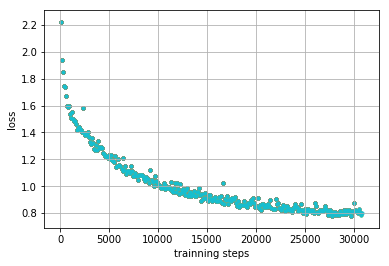

In [9]:
saveModel_dir = './model/' + datetime.now().strftime("%Y%m%d_%H%M%S")
makedirs(saveModel_dir)    
log_dir = './log/' + datetime.now().strftime("%Y%m%d_%H%M%S")
makedirs(log_dir) 

sess = tf.InteractiveSession() 
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver(max_to_keep=5)

show = [[],[]]
train_log = []
lr = 1e-4
timer_train = time()
iters = (len(imgs)-valid_size) // BATCH_SIZE

for epc in range(N_EPOCHS):
    
    batch_order = list(range(len(imgs)-valid_size))
    batch_order = shuffle(batch_order)

    for i in range(iters):
        
        step = epc * iters + i

        _idx = i * BATCH_SIZE
        
        batch_ = batch_order[_idx:_idx+BATCH_SIZE]
        batch_imgs = [imgs[i] for i in batch_]
        batch_labels = [labels[i] for i in batch_]
        batch_x, batch_y = to_dataset(batch_imgs, 
                                      batch_labels)        
        sess.run(train_op, feed_dict={x: batch_x, 
                                      y: batch_y, 
                                      learning_rate:lr})     
        
        if i%100==99:
            _loss = cross_entropy.eval(session=sess, feed_dict={x:valid_x, 
                                                                y:valid_y})
            _acc = accuracy.eval(session=sess, feed_dict={x:valid_x, 
                                                          y:valid_y})
            _log = 'epc:%2d/%2d, iters:%4d/%4d, loss:%.5f, in_acc:%.1f, duration:%.1f '%(epc+1, N_EPOCHS, i, iters, _loss, _acc*100, time()-timer_train)
            print(_log)  
            
            show[0].append(epc*iters+i)
            show[1].append(_loss)
            plt.scatter(show[0], show[1], s=10, edgecolors=None)
            plt.grid(True)
            #plt.yscale('log')
            plt.xlabel('trainning steps'); 
            plt.ylabel('loss')
            plt.savefig(saveModel_dir + '/loss.png')
            
    saver.save(sess, saveModel_dir + '/model_epc', global_step=epc)
    train_log.append(_log)
    
saver.save(sess, saveModel_dir + '/model_end')

# Test Dataset

In [10]:
img_list_test = glob.glob('cifar/test/*.png')
img_list_test.sort()

imgs_test, labels_test = load_png(img_list_test)

test_x, test_y = to_dataset(imgs_test, 
                            labels_test)   

print(test_x.shape)
print(test_y.shape)

(10000, 32, 32, 3)
(10000, 10)


In [11]:
t0 = time()
batch_size = 32
y_pred = np.array([])
for i in range(len(test_x)//batch_size):
    p = pred.eval(feed_dict={x: test_x[i*batch_size :(i+1)*batch_size]})
    y_pred = np.hstack([y_pred, p])
    
y_true = np.array([np.argmax(test_y[i]) for i in range(len(test_y))])[:len(y_pred)]

out_acc = sum(y_true==y_pred)/len(y_true)
out_acc

0.7030248397435898

In [12]:
sess.close()